In [16]:
import math
import numpy as np
from scipy.special import erf
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
import scipy.optimize as opt

In [4]:
def mse_gaussian(alpha, sigma, num_bits):
    clipping_err = (sigma ** 2 + (alpha ** 2)) * (1 - math.erf(alpha / (sigma * np.sqrt(2.0)))) - \
                   np.sqrt(2.0 / np.pi) * alpha * sigma * (np.e ** ((-1) * (0.5 * (alpha ** 2)) / sigma ** 2))
    quant_err = (alpha ** 2) / (3 * (2 ** (2 * num_bits)))
    return clipping_err + quant_err

def mse_laplace(alpha, b, num_bits):
    return 2 * (b ** 2) * np.exp(-alpha / b) + ((alpha ** 2) / (3 * 2 ** (2 * num_bits)))

## Solution for Gaussian case
```
We can optimize mse_laplace funcation empirically and find optimal alpha for different values of b and num_bits.
```

Text(0,0.5,'optimal alpha')

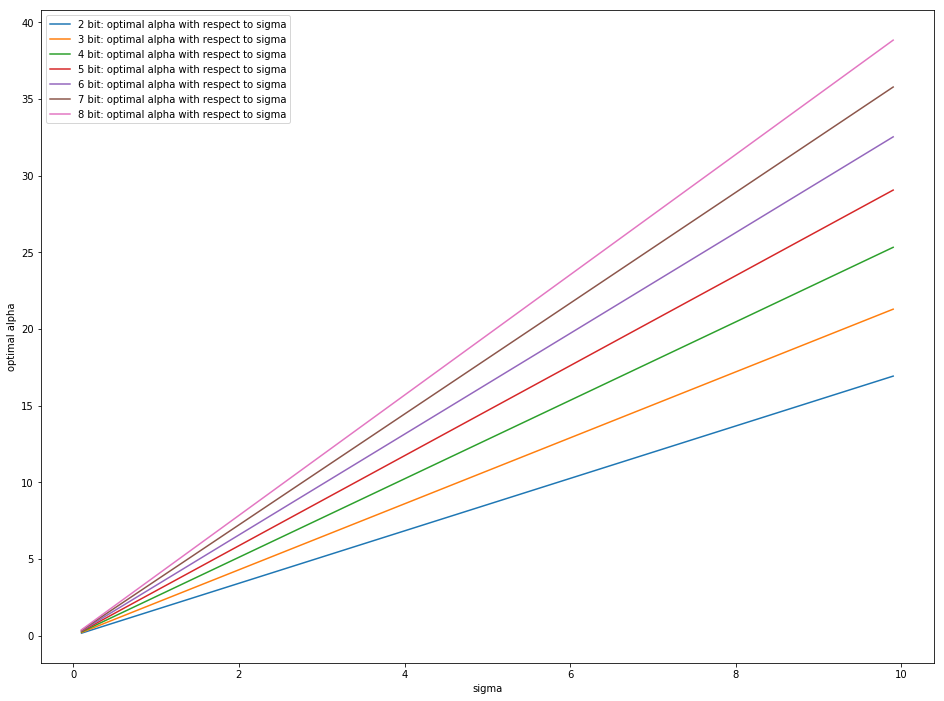

In [27]:
legends = []
for m in [2,3,4,5,6,7,8]:
    min_ = 0.1; max_ = 10; step = 0.1
    sigma_values = np.arange(min_,max_,step)
    alphas = []
    for sigma in sigma_values:
        alphas.append(opt.minimize_scalar(lambda x: mse_gaussian(x, sigma=sigma, num_bits=m)).x)
    alphas = np.array(alphas)
    plt.plot(b_values, alphas)
    legends.append('%d bit: optimal alpha with respect to sigma' % m)
plt.legend(legends)
plt.xlabel('sigma')
plt.ylabel('optimal alpha')

In [28]:
# From plot above we can see that there is linear dependency between optimal alpha value and sigma.
# We can find direct formula for optimal alpha as following opt_alpha(b) = opt_alpha(1) * sigma
sigma=1.
print("Optimal alpha coeficients for for gaussian clipping")
alphas = []
for m in range(2,9,1):
    alphas.append(opt.minimize_scalar(lambda x: mse_gaussian(x, sigma=sigma, num_bits=m)).x)
print(np.array(alphas))

Optimal alpha coeficients for for gaussian clipping
[1.71063516 2.1515927  2.55913642 2.93620058 3.28691461 3.61511418
 3.92403337]


## Solution for Laplace case
```
We can optimize mse_laplace funcation empirically and find optimal alpha for different values of b and num_bits.
```

Text(0,0.5,'optimal alpha')

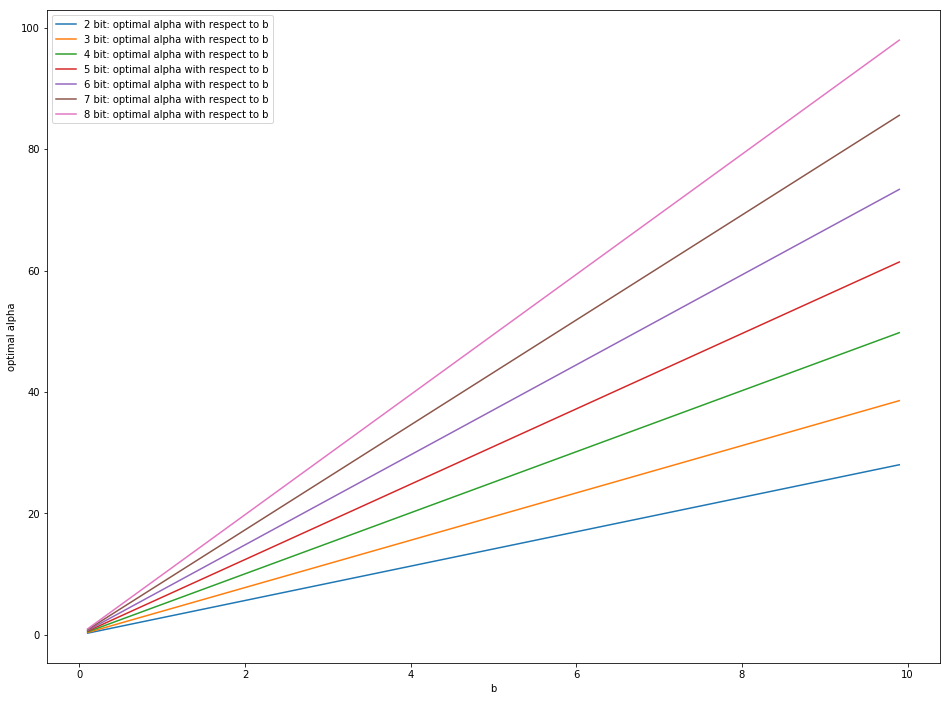

In [26]:
legends = []
for m in [2,3,4,5,6,7,8]:
    min_ = 0.1; max_ = 10; step = 0.1
    b_values = np.arange(min_,max_,step)
    alphas = []
    for b in b_values:
        alphas.append(opt.minimize_scalar(lambda x: mse_laplace(x, b=b, num_bits=m)).x)
    alphas = np.array(alphas)
    plt.plot(b_values, alphas)
    legends.append('%d bit: optimal alpha with respect to b' % m)
plt.legend(legends)
plt.xlabel('b')
plt.ylabel('optimal alpha')

In [22]:
# From plot above we can see that there is linear dependency between optimal alpha value and b.
# We can find direct formula for optimal alpha as following opt_alpha(b) = opt_alpha(1) * b

b=1.
print("Optimal alpha coeficients for laplace case.")
alphas = []
for m in range(2,9,1):
    alphas.append(opt.minimize_scalar(lambda x: mse_laplace(x, b=b, num_bits=m)).x)
print(np.array(alphas))

Optimal alpha coeficients for laplace case.
[2.83068299 3.89722946 5.02864014 6.20476633 7.41312622 8.64561995
 9.89675982]
